In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
img = dlib.load_rgb_image("deepface/tests/dataset/img1.jpg")

In [4]:
base_img = img.copy()

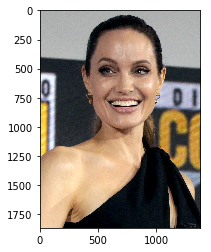

In [5]:
plt.imshow(img)

In [6]:
faces = face_detector(img, 1)

In [7]:
faces

rectangles[[(354, 354) (1019, 1020)]]

In [8]:
img = base_img.copy()

In [9]:
landmark_tuple = []
for k, d in enumerate(faces):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
    
    landmarks = landmark_detector(img, d)
    #print(landmarks)
    
    for n in range(0, 27):
        x = landmarks.part(n).x 
        y = landmarks.part(n).y 
        landmark_tuple.append((x, y))
        
        cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

Detection 0: Left: 354 Top: 354 Right: 1019 Bottom: 1020


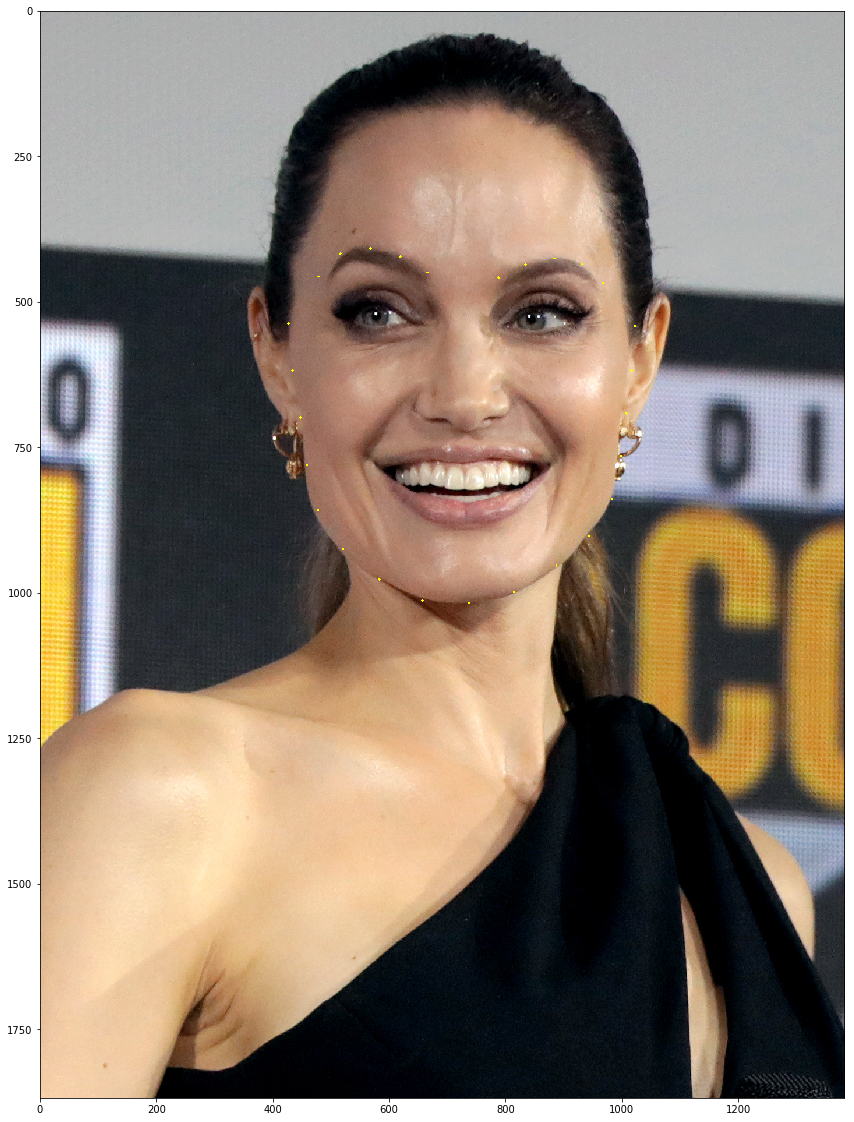

In [10]:
plt.figure(figsize = (20,20))
plt.imshow(img)

In [11]:
routes = []

for i in range(15, -1, -1):
    from_coordinate = landmark_tuple[i+1]
    to_coordinate = landmark_tuple[i]
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[0]
to_coordinate = landmark_tuple[17]
routes.append(from_coordinate)

for i in range(17, 20):
    from_coordinate = landmark_tuple[i]
    to_coordinate = landmark_tuple[i+1]    
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[19]
to_coordinate = landmark_tuple[24]
routes.append(from_coordinate)

for i in range(24, 26):
    from_coordinate = landmark_tuple[i]
    to_coordinate = landmark_tuple[i+1]    
    routes.append(from_coordinate)

#---------------------------------------

from_coordinate = landmark_tuple[26]
to_coordinate = landmark_tuple[16]
routes.append(from_coordinate)
routes.append(to_coordinate)

In [12]:
img = base_img.copy()
for i in range(0, len(routes)-1):
    from_coordinate = routes[i]
    to_coordinate = routes[i+1]
    
    #print(from_coordinate," to ",to_coordinate)
    
    img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 2)

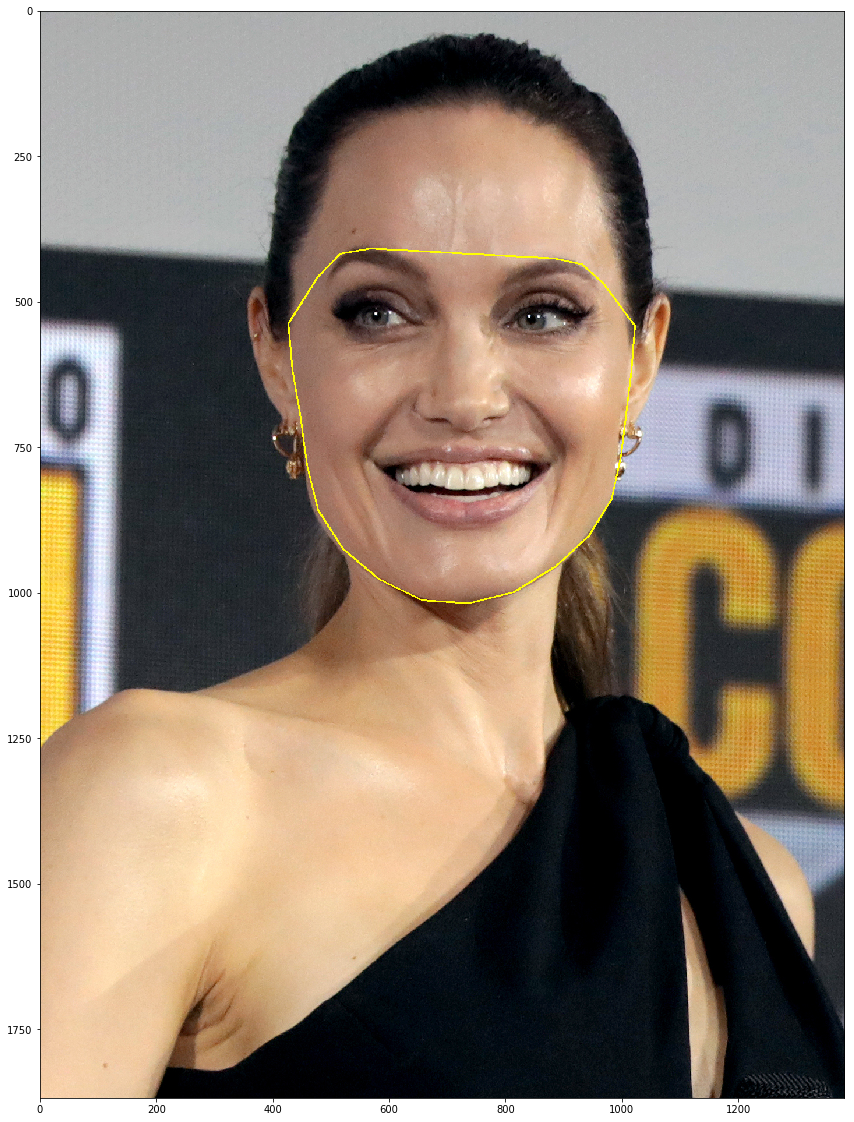

In [13]:
plt.figure(figsize = (20,20))
plt.imshow(img)

# Extract facial area

In [14]:
img = base_img.copy()

In [15]:
routes

[(1021, 542),
 (1015, 618),
 (1006, 692),
 (997, 765),
 (981, 839),
 (942, 902),
 (886, 954),
 (813, 999),
 (736, 1018),
 (656, 1013),
 (582, 977),
 (520, 925),
 (477, 858),
 (458, 781),
 (447, 699),
 (433, 618),
 (426, 538),
 (477, 457),
 (515, 418),
 (567, 409),
 (567, 409),
 (882, 426),
 (930, 436),
 (966, 468),
 (1021, 542)]

In [16]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(np.bool)
#plt.imshow(mask)

In [17]:
out = np.zeros_like(img)
out[mask] = img[mask]

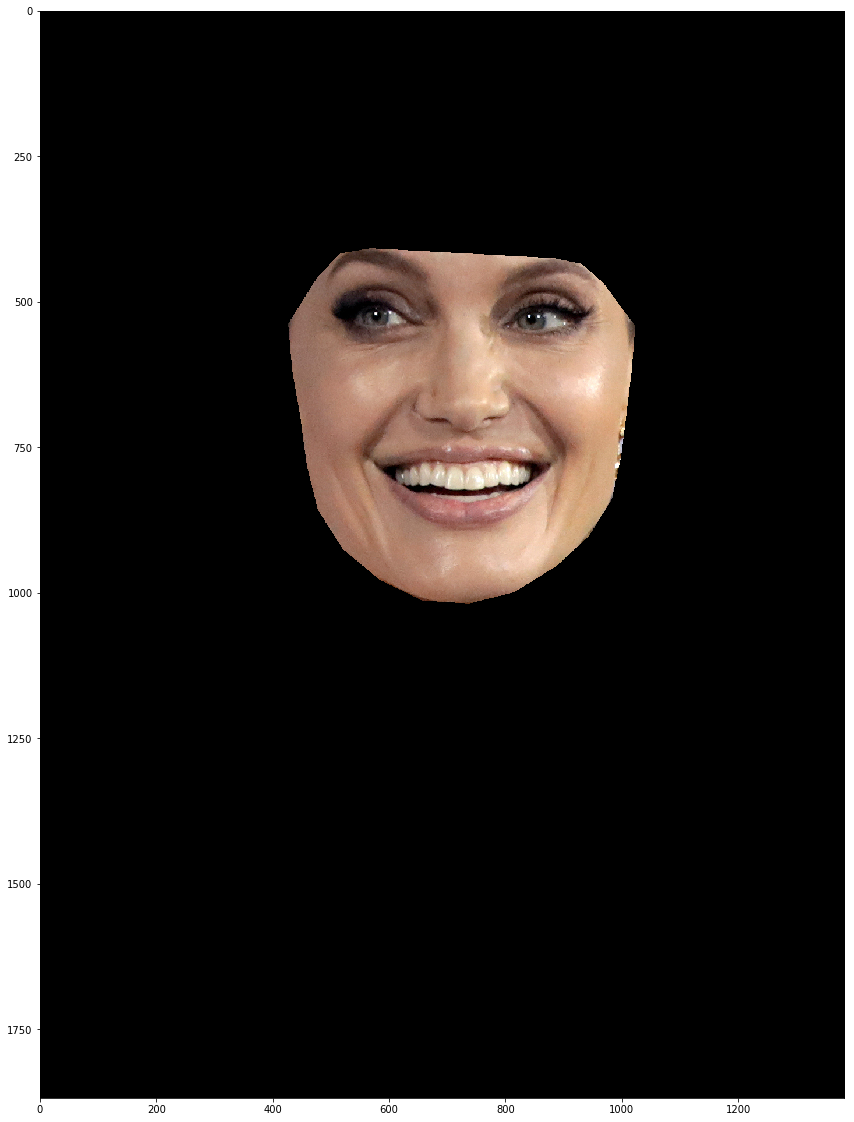

In [18]:
plt.figure(figsize = (20,20))
plt.imshow(out)

# Blur background

In [19]:
def blur_img(img, factor):

    kW = int(img.shape[1] / factor)
    kH = int(img.shape[0] / factor)

    #ensure the shape of the kernel is odd
    if kW % 2 == 0: kW = kW - 1
    if kH % 2 == 0: kH = kH - 1
    
    blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
    return blurred_img

In [20]:
blurred_img = blur_img(img, factor = 40)

In [21]:
blurred_img[mask] = img[mask]

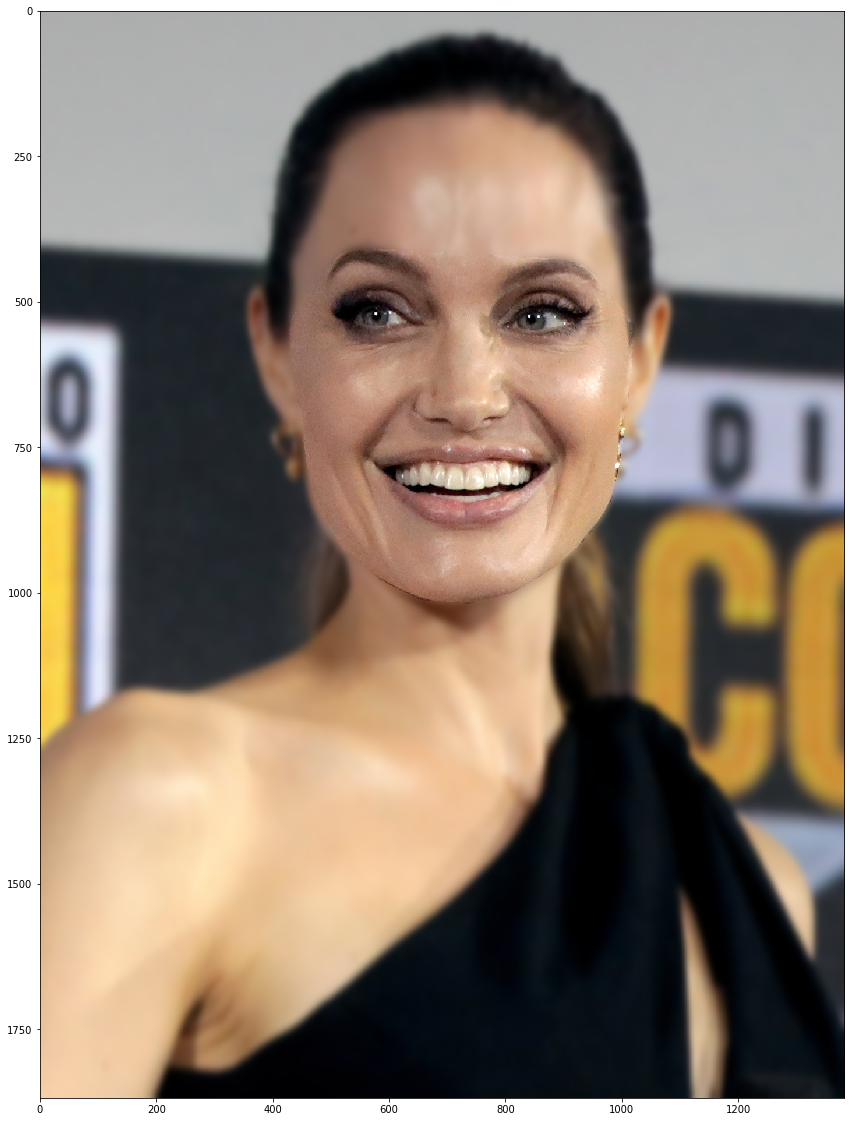

In [22]:
plt.figure(figsize = (20,20))
plt.imshow(blurred_img)